In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv(r"D:\JAIMIN\Data Science\Machine Learning\Diabetes\diabetes.csv")

In [3]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [4]:
df.shape

(768, 9)

In [5]:
df.size

6912

In [6]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")
plt.show()

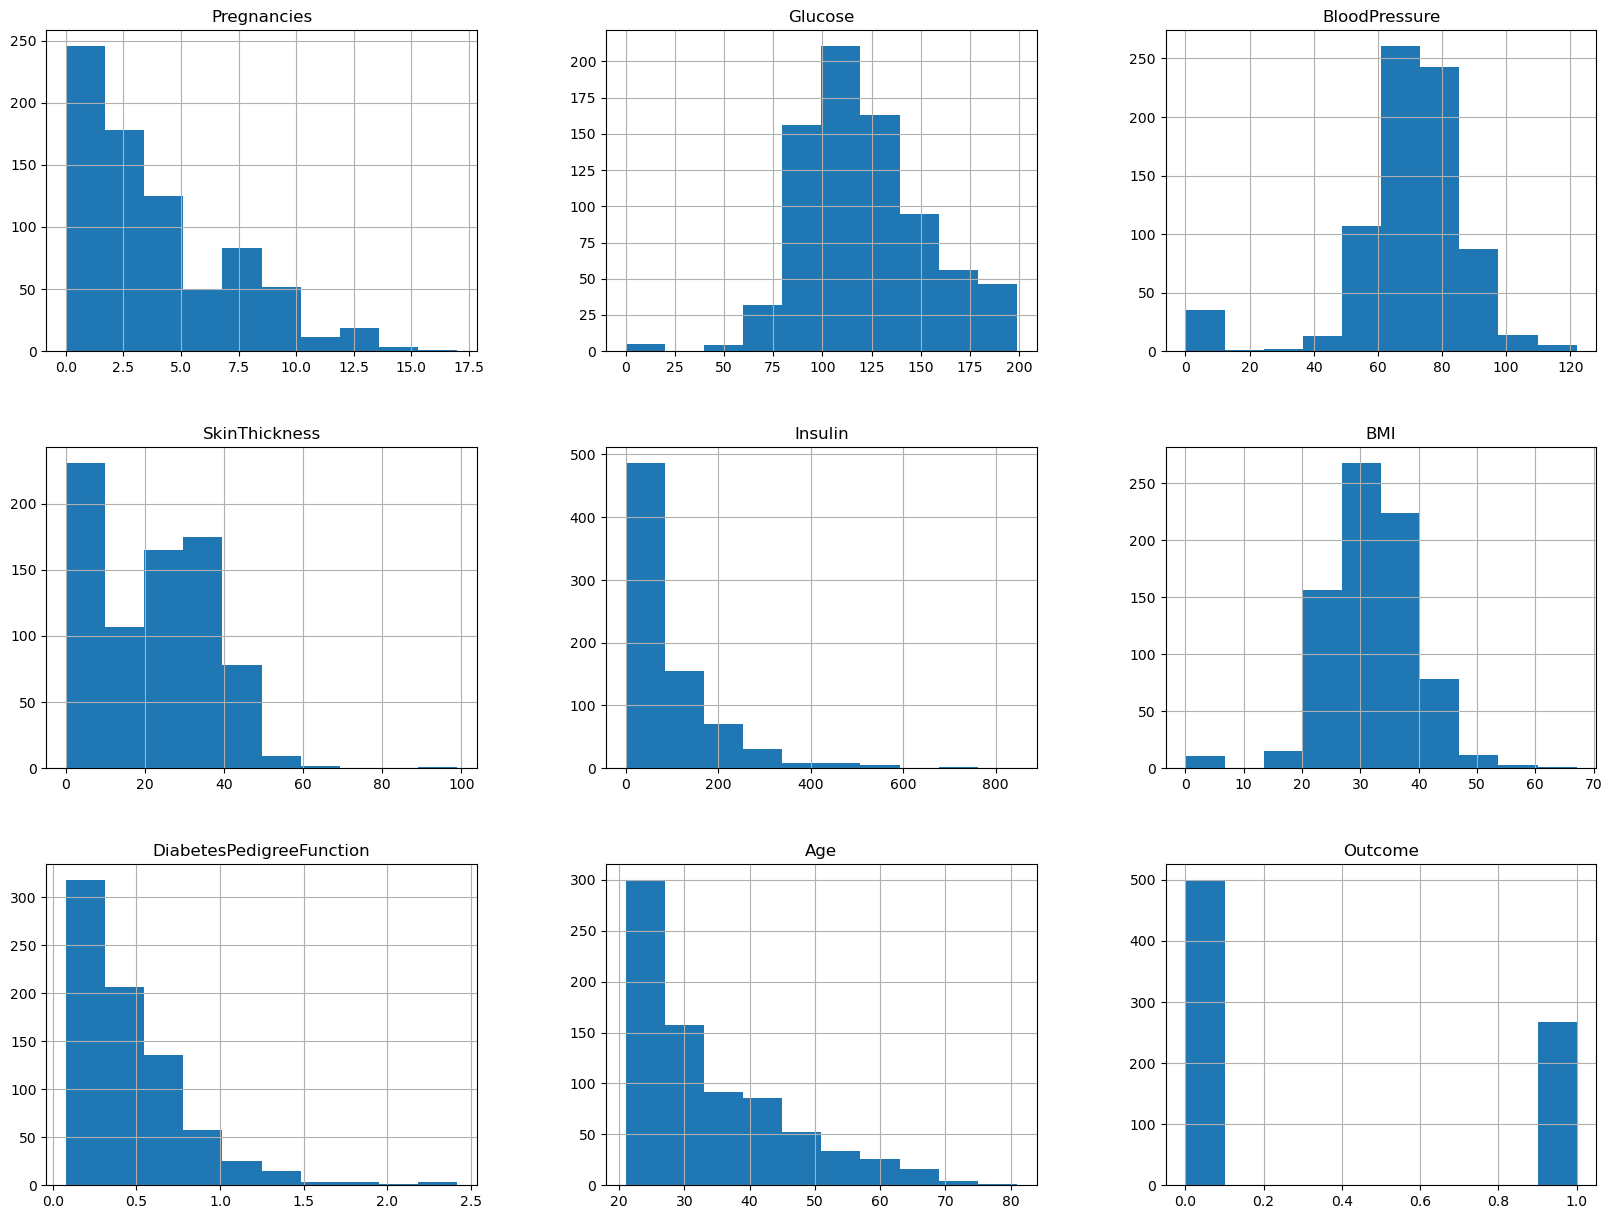

In [13]:
df.hist(figsize=(20,15));

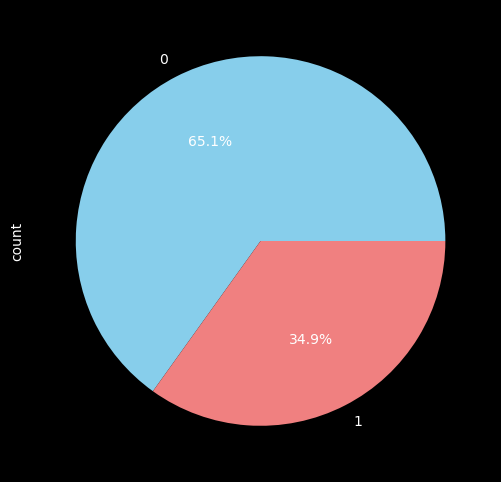

In [14]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.figure(figsize=(6, 6))
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.show()

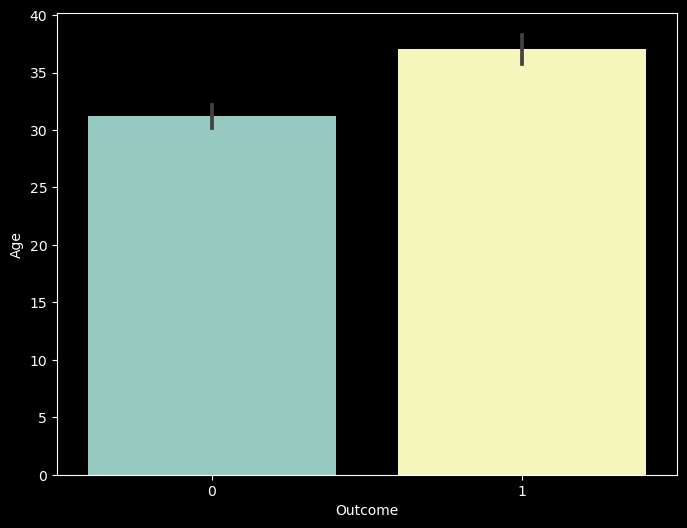

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='Age', data=df)
plt.show()

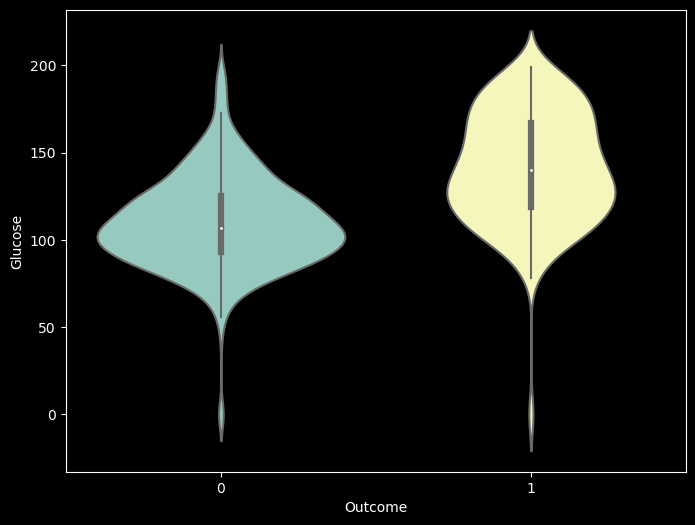

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
sns.violinplot(x='Outcome', y='Glucose', data=df)
plt.show()

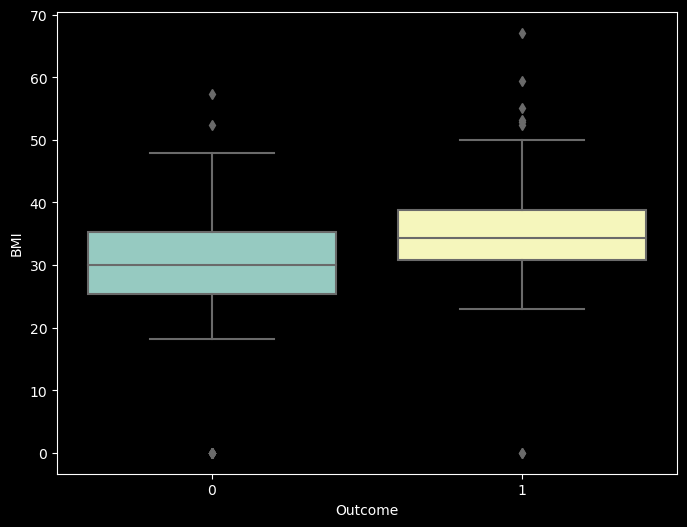

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.show()

<Axes: xlabel='Glucose', ylabel='BloodPressure'>

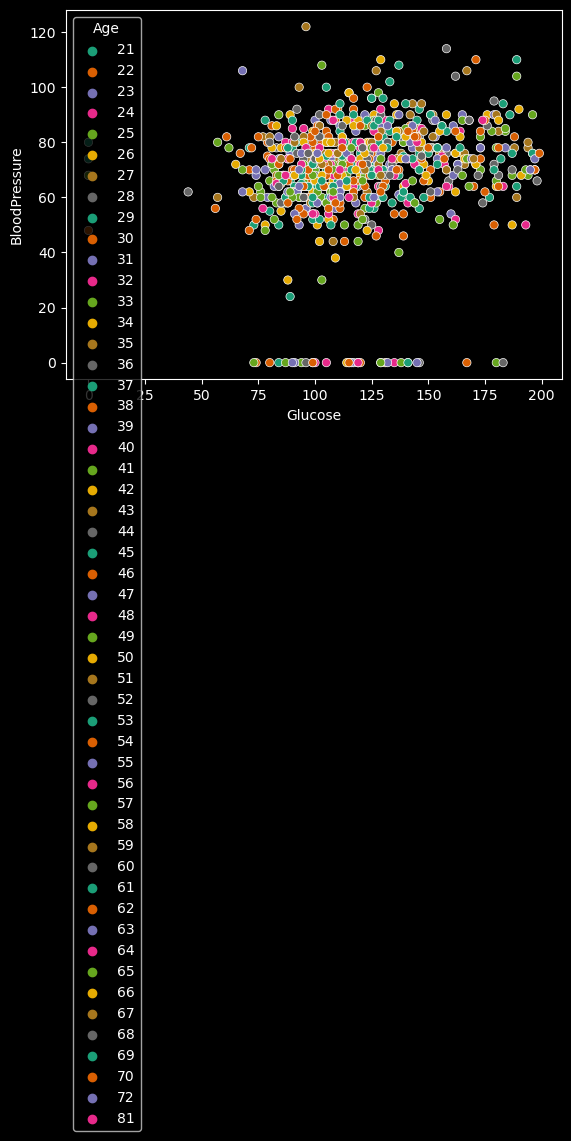

In [18]:
sns.scatterplot(x = 'Glucose', y = 'BloodPressure', data = df, hue = 'Age', palette = 'Dark2')

D:\ANACONDA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


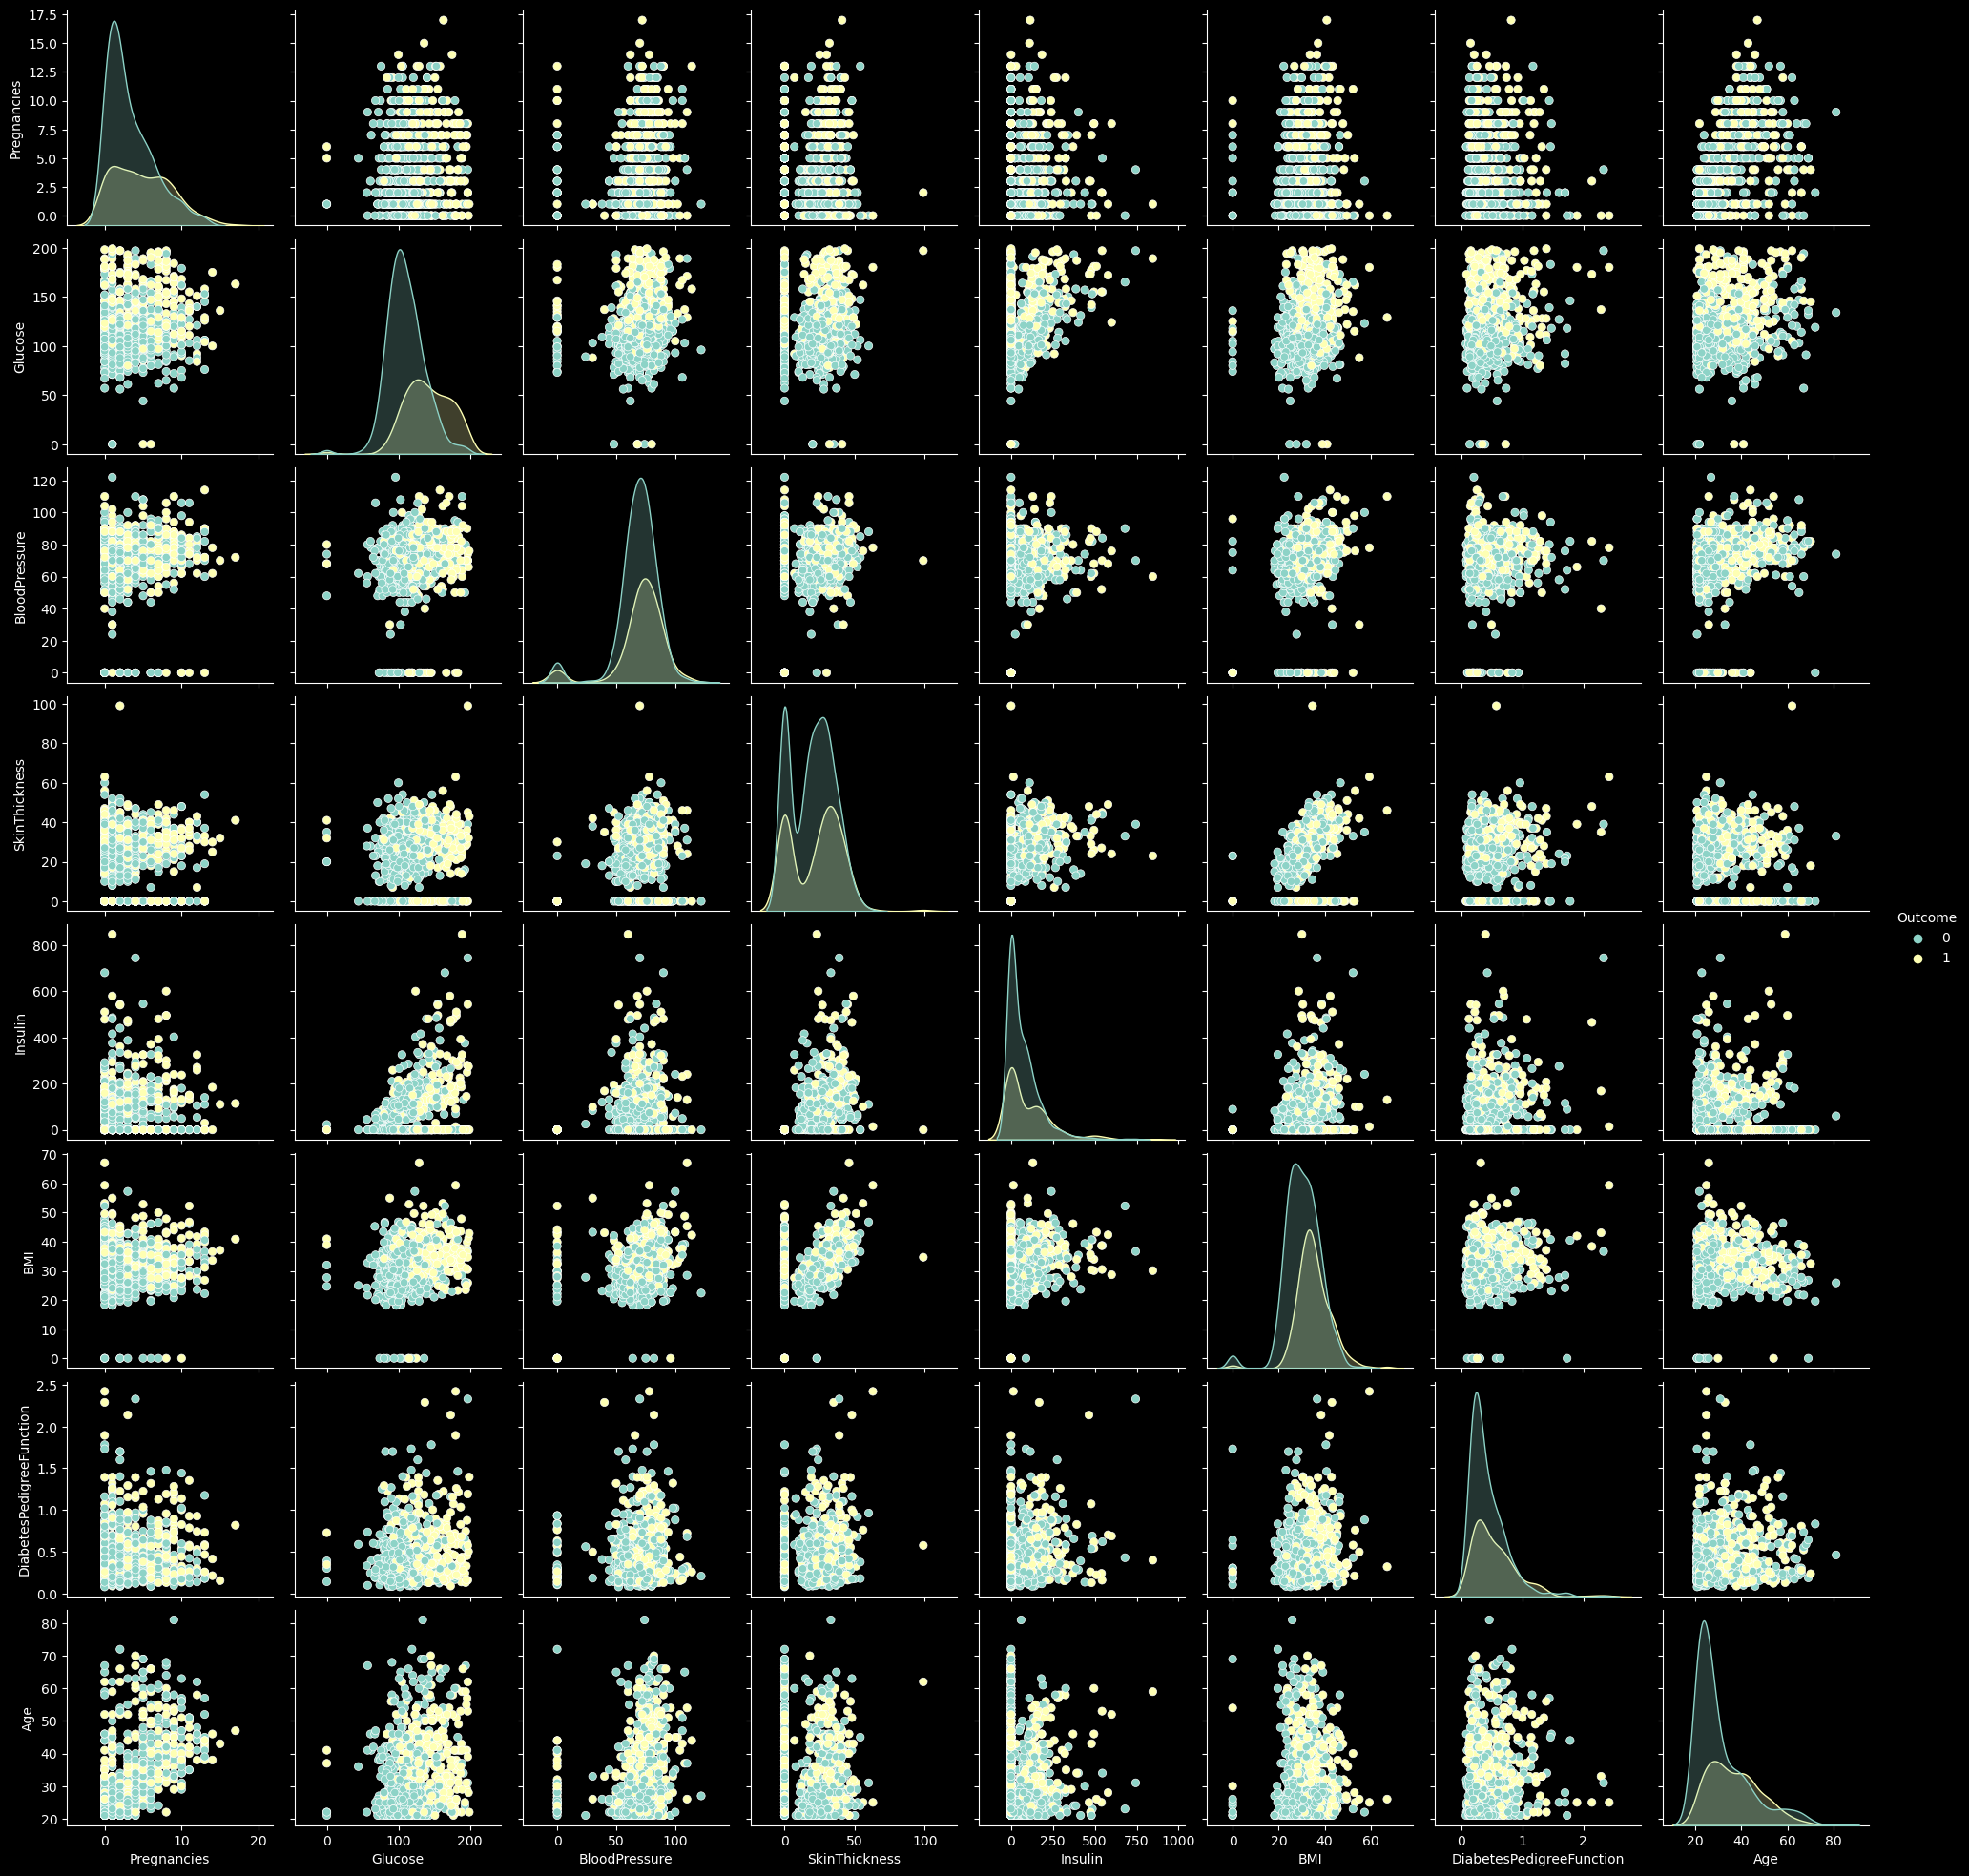

In [19]:
sns.pairplot(df, hue = 'Outcome')

In [20]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
x = df.drop('Outcome', axis = 1)
print(x)
y = df['Outcome']
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)

In [26]:
scaler = StandardScaler()
scaled_x_test = scaler.fit_transform(x_test)

In [27]:
from sklearn.svm import SVC, LinearSVR

In [28]:
base_model = SVC()

In [29]:
base_model.fit(scaled_x_train, y_train)

SVC()

In [30]:
base_preds = base_model.predict(scaled_x_test)
base_preds

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVR
import pickle

In [32]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30, random_state=42)

In [33]:
x_train

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
334            1       95             60             18       58  23.9   
139            5      105             72             29      325  36.9   
485            0      135             68             42      250  42.3   
547            4      131             68             21      166  33.1   
18             1      103             30             38       83  43.3   
..           ...      ...            ...            ...      ...   ...   
71             5      139             64             35      140  28.6   
106            1       96            122              0        0  22.4   
270           10      101             86             37        0  45.6   
435            0      141              0              0        0  42.4   
102            0      125             96              0        0  22.5   

     DiabetesPedigreeFunction  Age  
334                     0.260   22  
139                     0.159   28  
485                     0.365   24  
547                     0.160   28  
18                      0.183   33  
..                        ...  ...  
71                      0.411   26  
106                     0.207   27  
270                     1.136   38  
435                     0.205   29  
102                     0.262   21  

[537 rows x 8 columns]

In [34]:
scaled_x_test

array([[-8.70288108e-01,  1.48860465e-01, -3.84406328e-01, ...,
        -1.83939678e-01, -3.04699518e-01,  1.24216290e+00],
       [-2.89257608e-01,  2.03349012e+00,  9.71438985e-02, ...,
         6.14174256e-01, -1.43671571e-01,  2.61020243e-01],
       [ 8.72803392e-01, -4.69050898e-01,  1.15655440e+00, ...,
        -1.12140684e+00, -6.15838263e-01,  1.33135769e+00],
       ...,
       [-5.79772858e-01,  1.10662308e+00,  2.89763989e-01, ...,
         9.94228510e-01, -8.91496274e-01, -2.74148480e-01],
       [-1.16080336e+00, -4.99946466e-01,  8.33853206e-04, ...,
        -1.46345567e+00, -6.13108976e-01, -9.87706778e-01],
       [ 8.72803392e-01, -3.76364194e-01,  5.78694125e-01, ...,
         5.50831880e-01,  1.81868595e+00,  8.85383754e-01]])

In [35]:
regression= SVC()

In [36]:
x_train = pd.get_dummies(x_train)

In [37]:
regression.fit(x_train, y_train)

SVC()

In [38]:
pickle.dump(regression, open('SVM_Diabetes.pickle','wb'))

In [39]:
ls

 Volume in drive C is OS
 Volume Serial Number is E077-265C

 Directory of C:\Users\Jaimin Shah\Data Science

16-09-2024  13:21    <DIR>          .
11-09-2024  06:18    <DIR>          ..
16-09-2024  13:21    <DIR>          .ipynb_checkpoints
29-07-2024  09:24               689 admission_datalr_model
01-08-2024  10:58               525 admission_datalr_model.pickle
05-08-2024  09:01               461 advertising_model.pickle
06-09-2024  08:18            41,236 bi2.png
06-09-2024  08:18            20,905 bi3.png
16-09-2024  10:10         1,239,458 Decision Tree Binary Classification Exercise Dataset.ipynb
12-09-2024  07:31           533,387 Decision Tree IRIS Dataset.ipynb
16-09-2024  10:10         3,192,220 Decision Tree Red Wine Quality.ipynb
12-09-2024  07:31           671,991 Decision Tree Toy Dataset.ipynb
06-09-2024  13:22             1,205 diabetes_012_health_indicators_model.pickle
30-07-2024  09:47               605 heart_failure_clinical_model.pickle
30-07-2024  09:40          

In [40]:
model= pickle.load((open('SVM_Diabetes.pickle','rb')))

In [41]:
model

SVC()

In [42]:
regression.score(x_train, y_train)

0.7802607076350093

In [43]:
x_test = pd.get_dummies(x_test)
regression.score(x_test, y_test)

0.7359307359307359

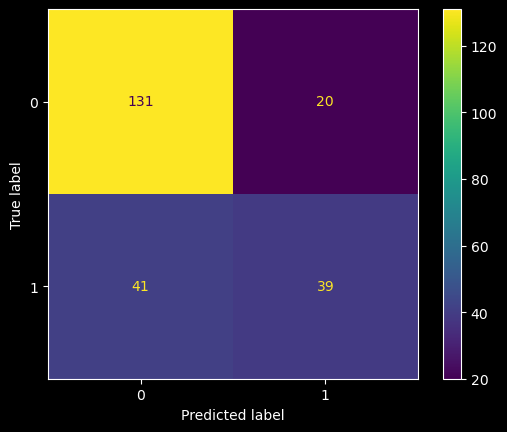

In [44]:
ConfusionMatrixDisplay.from_estimator(regression, x_test, y_test)

In [45]:
y_pred = regression.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       151
           1       0.66      0.49      0.56        80

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231



In [48]:
from sklearn.metrics import RocCurveDisplay
from sklearn.multiclass import OneVsRestClassifier

In [49]:
ovr = OneVsRestClassifier(regression)

In [50]:
ovr.fit(x_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [52]:
log_model = LogisticRegression(solver = 'saga', multi_class = 'ovr', max_iter = 10000)

In [53]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)
param_grid = {'penalty': penalty, 'l1_ratio': l1_ratio, 'C': C}

In [54]:
grid_model = GridSearchCV(log_model, param_grid = param_grid)

In [55]:
grid_model.fit(scaled_x_train, y_train)

D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
D:\ANACONDA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\ANACONDA\anaconda3\Lib\site-pac

GridSearchCV(estimator=LogisticRegression(max_iter=10000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [56]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [57]:
y_pred = grid_model.predict(scaled_x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [58]:
accuracy_score(y_test, y_pred)

0.6536796536796536

In [59]:
confusion_matrix(y_test, y_pred)

array([[150,   1],
       [ 79,   1]], dtype=int64)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.99      0.79       151
           1       0.50      0.01      0.02        80

    accuracy                           0.65       231
   macro avg       0.58      0.50      0.41       231
weighted avg       0.60      0.65      0.52       231



In [61]:
from sklearn.metrics import RocCurveDisplay

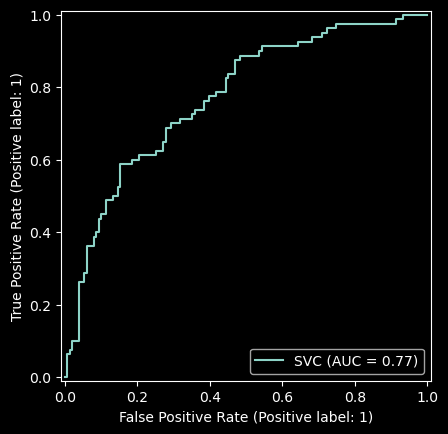

In [62]:
RocCurveDisplay.from_estimator(regression,x_test,y_test)